# Statistical Learning Projetc

**By:** Thomas Labreur

**Teacher:** Franck Iutzeler

You can find the entire proect on my github page : https://github.com/Thomas-labreur/StatLearnProject.git

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

## Retrieve Data

First let's have a look on the data, by a correlation analysis and a PCA.

In [2]:
# Load train data
X = np.loadtxt("data/X.txt")
y = np.loadtxt("data/y.txt")

# Load try data
X_try = np.loadtxt("data/X_try.txt")
y_try = np.loadtxt("data/y_try.txt")

# Load validation data
X_val = np.loadtxt("data/X_val.txt")

# Pre-processing
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_try = scaler.transform(X_try)
X_val = scaler.transform(X_val)

print(f"La classe 1 représente {np.round(100*np.sum(y)/len(y),2)} % des données de X et {np.round(100*np.sum(y_try)/len(y_try),2)} % des données de X_try.")

La classe 1 représente 33.0 % des données de X et 17.5 % des données de X_try.


### Correlations

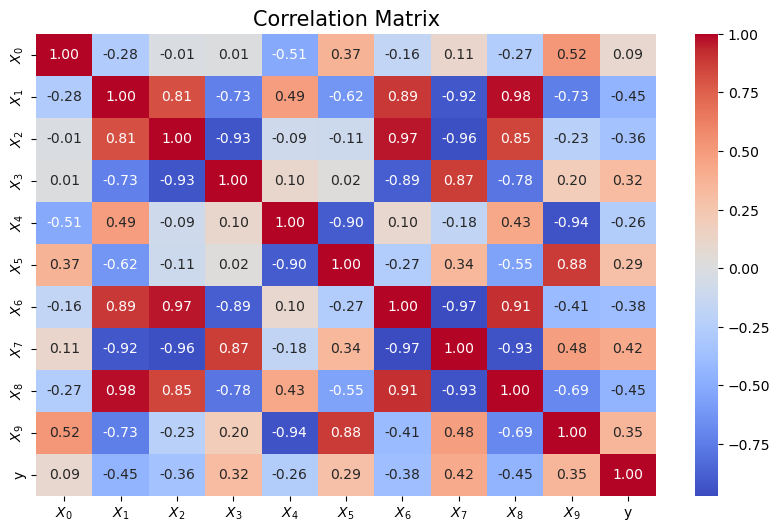

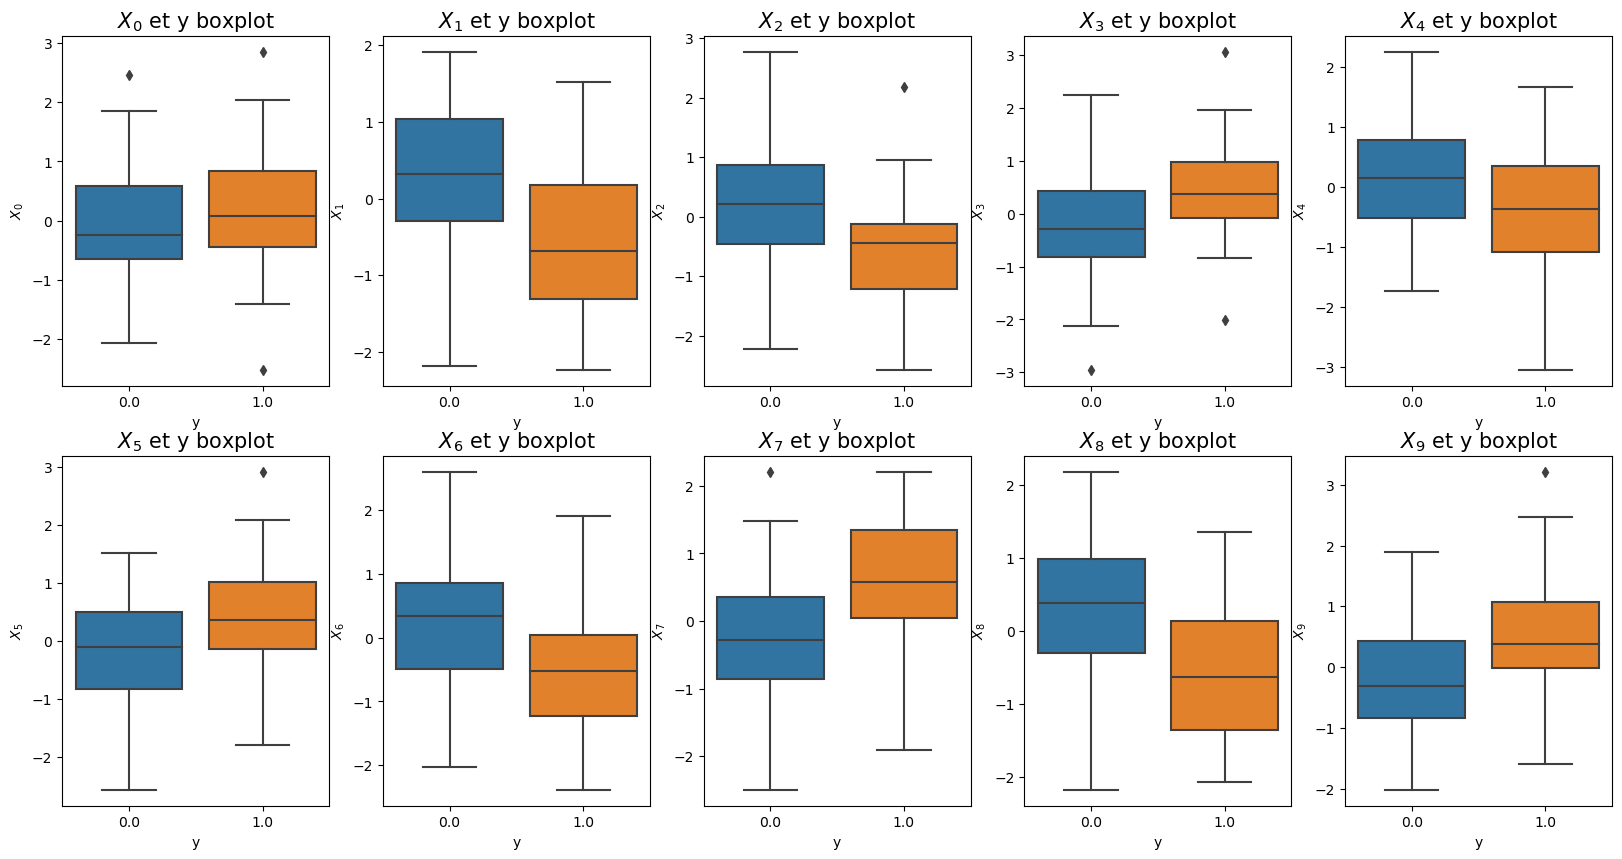

In [3]:
# Compute matrix
correlation_matrix = np.corrcoef(np.c_[X,y], rowvar=False)

# Display matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=[f"$X_{i}$" for i in range(X.shape[1])] + ['y'],
            yticklabels=[f"$X_{i}$" for i in range(X.shape[1])] + ['y'])
plt.title("Correlation Matrix", fontsize=15)
plt.show()

plt.figure(figsize=(20, 10))
for i in range(X.shape[1]):
    plt.subplot(2,5,i+1)
    sns.boxplot(x=y, y=X[:,i])
    plt.title(f"$X_{i}$ et y boxplot", fontsize=15)
    plt.xlabel("y")
    plt.ylabel(f"$X_{i}$")
plt.show()

### PCA

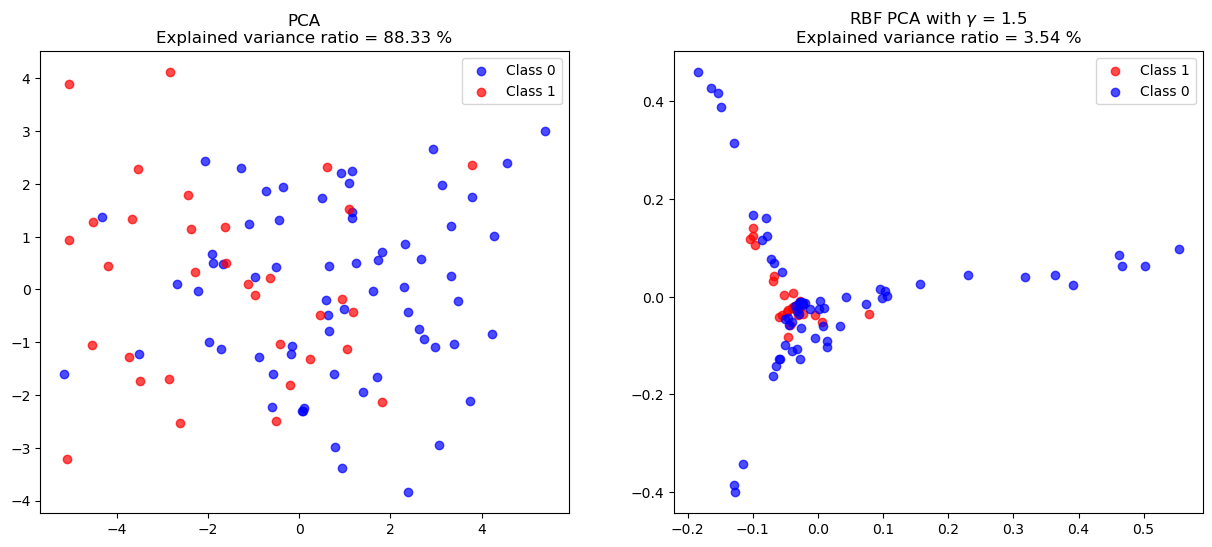

In [5]:
# Classic PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.c_[X,y])
ex_ratio = np.round(100*np.sum(pca.explained_variance_ratio_),2)
class_0 = X_pca[y == 0]
class_1 = X_pca[y == 1]

# Plot classic PCA results
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title(f"PCA\nExplained variance ratio = {ex_ratio} %")
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1', alpha=0.7)
plt.legend()

# Kernel PCA
gam=1.5
kpca = KernelPCA(n_components=None, kernel='rbf', gamma = gam)
X_pca = kpca.fit_transform(np.c_[X,y])
explained_variance = np.var(X_pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
ex_ratio = np.round(100*np.sum(explained_variance_ratio[:2]),2)
class_0 = X_pca[y == 0]
class_1 = X_pca[y == 1]

# Plot Kernel PCA results
plt.subplot(1,2,2)
plt.title(f"RBF PCA with $\gamma$ = {gam}\nExplained variance ratio = {ex_ratio} %")
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1', alpha=0.7)
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0', alpha=0.7)
plt.legend()

## Outlier Detection

In this section we use LOF, One class SVM and Isolation forest to find outliers in our scaled dataset. 
We use visuals to confirm this prediction.

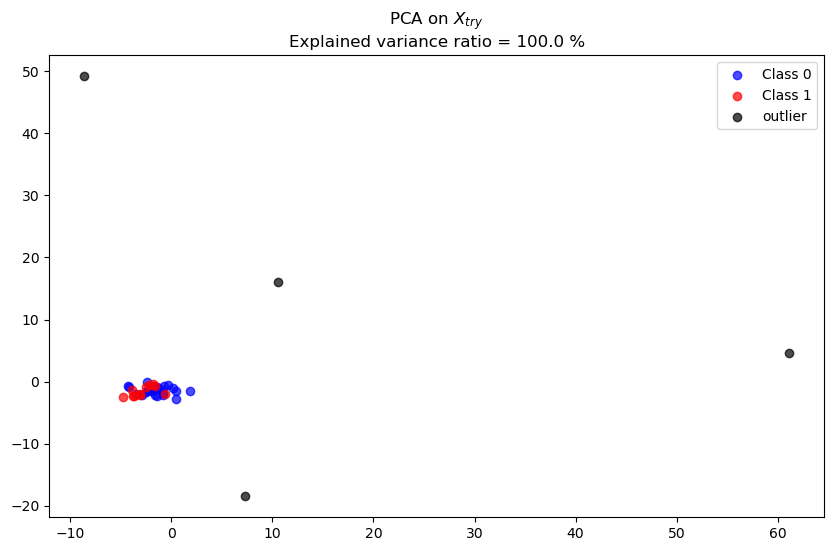

In [8]:
# Classic PCA
X_pca = pca.fit_transform(X_try)
ex_ratio = np.round(100*np.sum(pca.explained_variance_ratio_),2)
class_0 = X_pca[y_try == 0]
class_1 = X_pca[y_try == 1]

# Plot classic PCA results
plt.figure(figsize=(10, 6))
plt.title("PCA on $X_{try}$" + f"\nExplained variance ratio = {ex_ratio} %")
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1', alpha=0.7)
plt.scatter(X_pca[[4,14,19,35],0], X_pca[[4,14,19,35],1], c='black', label='outlier', alpha=0.7)
plt.legend()
plt.show()



10 % worst scores on X_try:
---------------------------
lof outliers  = [ 4 14 19 35]
svm outliers  = [ 4 14 19 35]
isf outliers  = [ 4 14 19 35]
real outliers = [ 4 14 19 35]

10 % worst scores on X_val:
---------------------------
lof outliers  = [17 32 43 47 51 55 59 77 82 98]
svm outliers  = [17 32 43 47 51 55 59 77 82 98]
isf outliers  = [17 32 43 47 51 55 59 77 84 98]


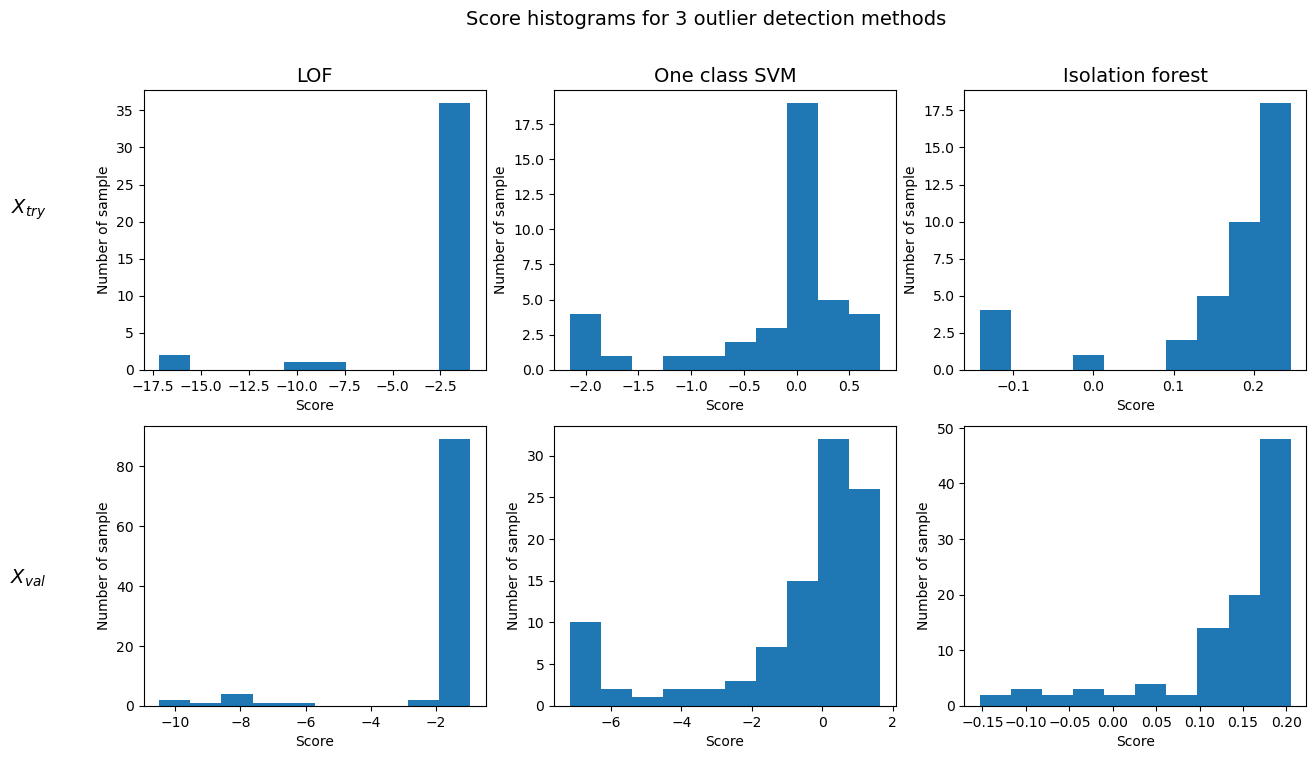

In [9]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

## LOF
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
lof_pred = np.where(lof.fit_predict(X_try)==-1)[0]
lof_scores = lof.negative_outlier_factor_

## SVM
svm = OneClassSVM(kernel='rbf', gamma=.1)
svm.fit(X_try)
svm_scores = svm.decision_function(X_try)
svm_pred = np.argsort(svm_scores)[:4]

# IF
isf = IsolationForest(n_estimators=200, contamination=0.1)
isf_pred = np.where(isf.fit_predict(X_try)==-1)[0]
isf_scores = isf.decision_function(X_try)

print("10 % worst scores on X_try:")
print("---------------------------")
print("lof outliers  =", np.sort(lof_pred))
print("svm outliers  =", np.sort(svm_pred))
print("isf outliers  =", np.sort(isf_pred))
print('real outliers =', np.where(y_try==-1)[0])

# Histograms on X_try
title=['LOF', 'One class SVM', 'Isolation forest']
fig, ax = plt.subplots(2,3,figsize=(15,8))
for i, scores in enumerate([lof_scores, svm_scores, isf_scores]):
    ax[0,i].hist(scores)
    ax[0,i].set_xlabel("Score")
    ax[0,i].set_ylabel("Number of sample")
    ax[0,i].set_title(f"{title[i]}", fontsize=14)
    
# Predctions on X_val
lof_pred = np.where(lof.fit_predict(X_val)==-1)[0]
lof_scores = lof.negative_outlier_factor_
svm.fit(X_val)
svm_scores = svm.decision_function(X_val)
svm_pred = np.argsort(svm_scores)[:10]
isf_pred = np.where(isf.fit_predict(X_val)==-1)[0]
isf_scores = isf.decision_function(X_val)

print("\n10 % worst scores on X_val:")
print("---------------------------")
print("lof outliers  =", np.sort(lof_pred))
print("svm outliers  =", np.sort(svm_pred))
print("isf outliers  =", np.sort(isf_pred))

# Histograms on X_val
for i, scores in enumerate([lof_scores, svm_scores, isf_scores]):
    ax[1,i].hist(scores)
    ax[1,i].set_xlabel("Score")
    ax[1,i].set_ylabel("Number of sample")
    
fig.text(0.06, 0.73 , '$X_{try}$', va='center', ha='right', fontsize=14)
fig.text(0.06, 0.27 , '$X_{val}$', va='center', ha='right', fontsize=14)
fig.suptitle("Score histograms for 3 outlier detection methods", fontsize=14)
plt.show()


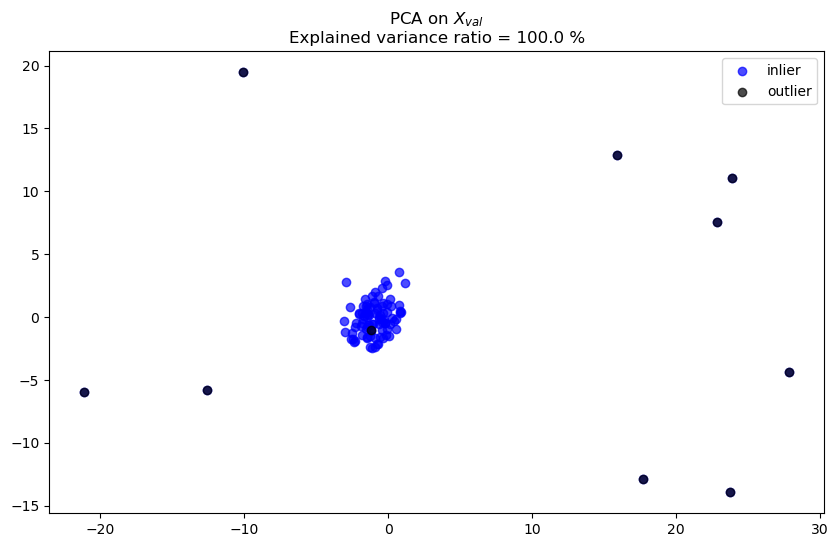

In [10]:
# Classic PCA
X_pca = pca.fit_transform(X_val)
ex_ratio = np.round(100*np.sum(pca.explained_variance_ratio_),2)


# Plot classic PCA results
plt.figure(figsize=(10, 6))
plt.title("PCA on $X_{val}$" + f"\nExplained variance ratio = {ex_ratio} %")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='inlier', alpha=0.7)
plt.scatter(X_pca[isf_pred,0], X_pca[isf_pred,1], c='black', label='outlier', alpha=0.7)
plt.legend()
plt.show()

## Classification

In this section, we use grid search to tune parameters for the following models: linear SVC, rbf SVC, KNN, Rnadom forest and XGBoost.
We also mesure performances on $X_{try}$. All of this is done with the *tune_parameters* function.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pandas as pd

In [ ]:
def tune_parameters(model, params, scoring, feature_selection=False):
    '''Tune a model parameter with grid search and compute it's performances (precision, recall, f-score and accuracy) on X_try'''
    
    # Grid search
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5,  scoring=scoring)
    
    # Feature selection
    if feature_selection:
        grid_search.fit(X[:,[0,1,9]], y)
    else:
        grid_search.fit(X, y)

    # Results
    print("CROSS VALIDATION RESULTS")
    print("Best parameters :", grid_search.best_params_)
    print("Score :", grid_search.best_score_)
    
    y_pred = grid_search.best_estimator_.predict(X_try[:,[0,1,9]] if feature_selection else X_try).astype(int)
    y_pred[[4,14,19,35]] = -1
             
    # Initiialize counters 
    TP = FP = TN = FN = 0

    # Compute counters
    for true, pred in zip(y_try, y_pred):
        if true == 1 and pred == 1:
            TP += 1  
        elif true == 1 and pred == 0:
            FN += 1  
        elif true == 0 and pred == 1:
            FP += 1  
        elif true == 0 and pred == 0:
           TN += 1  

    # Metric computing
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Display results
    print("\nTEST RESULTS")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Accuracy: {accuracy}")
    
    df_pred = pd.DataFrame({"pred": y_pred.astype(int), "truth":y_try.astype(int)})
    
    # PCA on X_try
    pca = PCA(n_components=2)
    X_try_pca = pca.fit_transform(X_try)

    # Figure
    plt.figure(figsize=(12,5))

    # Truth
    plt.subplot(1,2,1)
    plt.scatter(X_try_pca[df_pred['truth']==1,0], X_try_pca[df_pred['truth']==1,1], color='r', label="Class 1")
    plt.scatter(X_try_pca[df_pred['truth']==0,0], X_try_pca[df_pred['truth']==0,1], color='b', label="Class 0")
    plt.title("Groundtruth")

    # Prediction
    plt.subplot(1,2,2)
    plt.scatter(X_try_pca[df_pred['pred']==1,0], X_try_pca[df_pred['pred']==1,1], color='r', label="Class 1")
    plt.scatter(X_try_pca[df_pred['pred']==0,0], X_try_pca[df_pred['pred']==0,1], color='b', label="Class 0")
    plt.title("Prediction")
    
    return grid_search, df_pred

#### linear SVC

CROSS VALIDATION RESULTS
Best parameters : {'C': 1, 'kernel': 'linear'}
Score : 0.4826728826728826

TEST RESULTS
Precision: 0.8333333333333334
Recall: 0.45454545454545453
F1-score: 0.5882352941176471
Accuracy: 0.8055555555555556


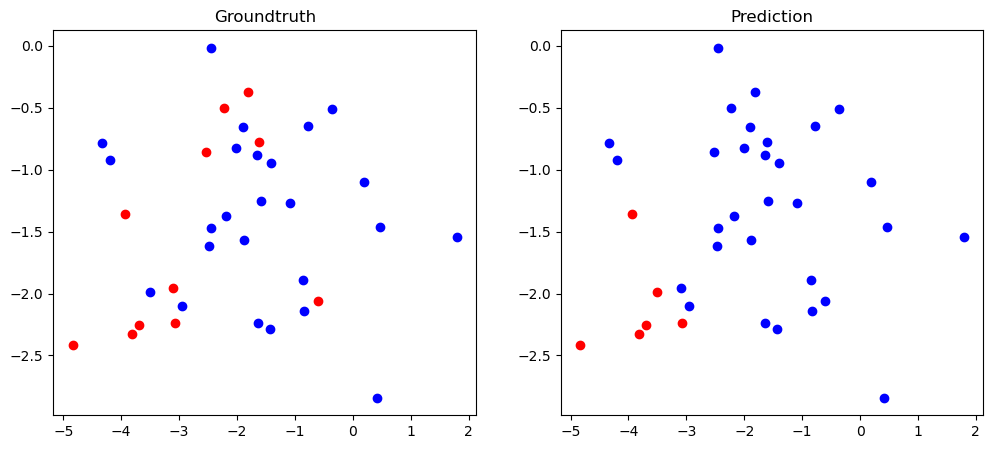

In [27]:
# SVC
params = {"C": [0.001,0.01,0.05,1,5,10,15,20], "kernel": ['linear']}
svc = SVC()
scoring = 'f1'

grid_search, df_pred = tune_parameters(svc, params, scoring, feature_selection=True)
          

#### RBF SVC


CROSS VALIDATION RESULTS
Best parameters : {'C': 10, 'gamma': 1.5, 'kernel': 'rbf'}
Score : 0.3229570429570429

TEST RESULTS
Precision: 0.6
Recall: 0.5454545454545454
F1-score: 0.5714285714285713
Accuracy: 0.75


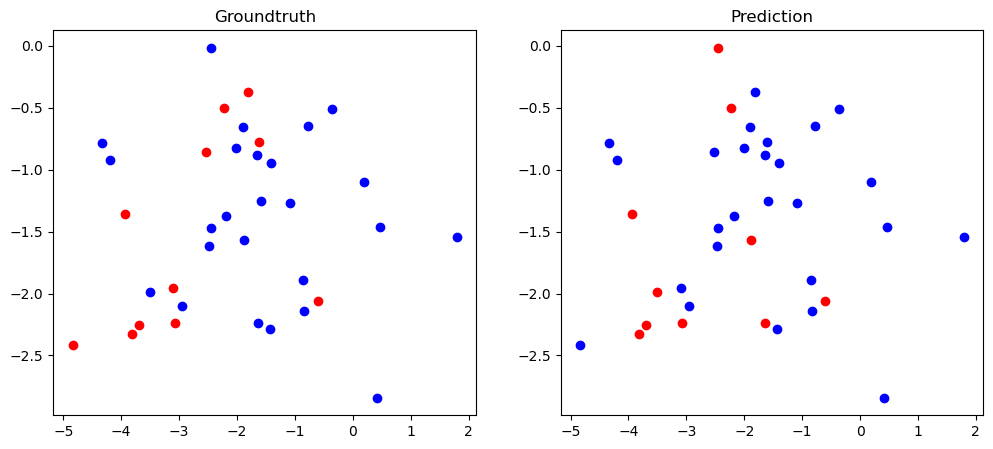

In [60]:
# SVC
params = {"C": [0.001,0.01,0.05,1,5,10,15,20], "kernel": ['rbf'], 'gamma':[1.5]}
svc = SVC()
scoring = 'f1'

grid_search, df_pred = tune_parameters(svc, params, scoring, feature_selection=True)

#### KNN

CROSS VALIDATION RESULTS
Best parameters : {'n_neighbors': 1, 'weights': 'uniform'}
Score : 0.47507002801120446

TEST RESULTS
Precision: 0.5
Recall: 0.45454545454545453
F1-score: 0.47619047619047616
Accuracy: 0.6944444444444444


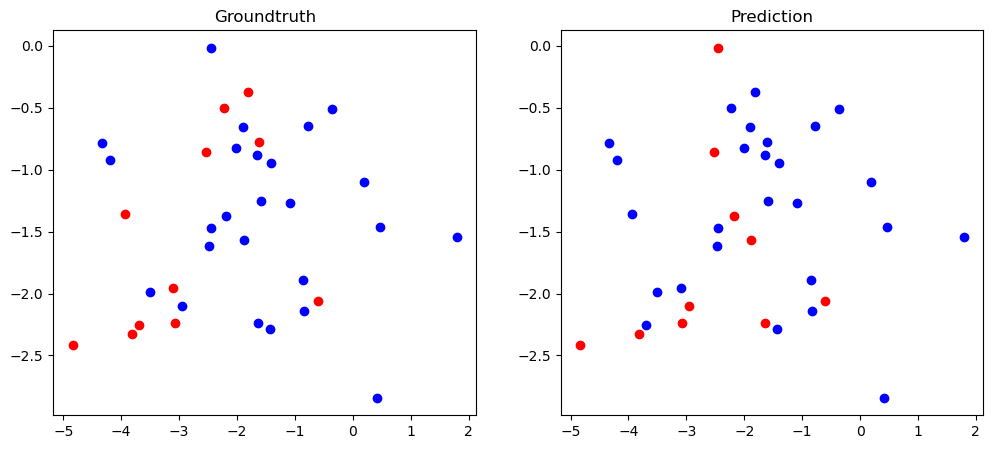

In [30]:
# KNN
params = {"n_neighbors":np.arange(1,20,2), "weights":['uniform', 'distance']}
knn = KNeighborsClassifier()

scoring = 'f1'

grid_search, df_pred = tune_parameters(knn, params, scoring, feature_selection=True)

#### Random Forest

c:\Users\totog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\totog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\totog\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\totog\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\totog\anaconda3\Lib\site-packa

CROSS VALIDATION RESULTS
Best parameters : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Score : 0.5415873015873016

TEST RESULTS
Precision: 0.625
Recall: 0.45454545454545453
F1-score: 0.5263157894736842
Accuracy: 0.75


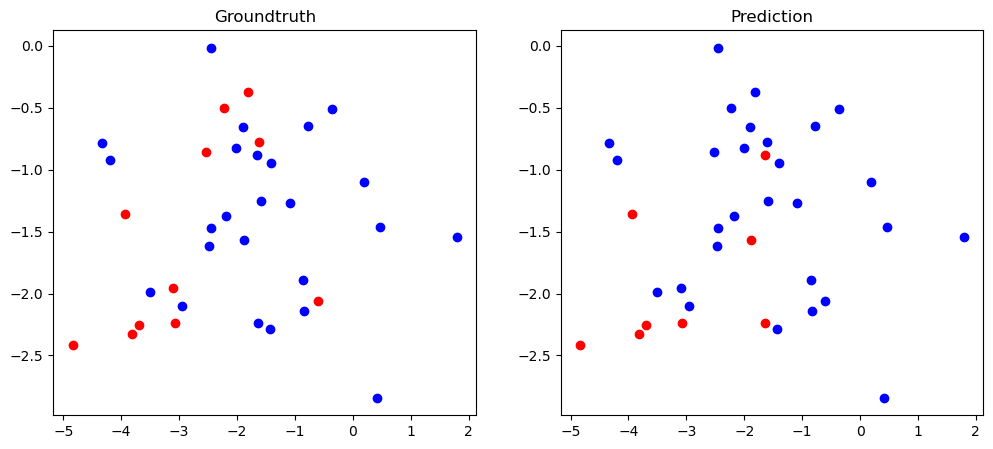

In [31]:
# Random forest
params = {
    'max_depth': [3,5,10,20, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200, 500]
    }
rf = RandomForestClassifier()

scoring = 'f1'

grid_search, df_pred = tune_parameters(rf, params, scoring)

#### XGBoost

CROSS VALIDATION RESULTS
Best parameters : {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Score : 0.5776556776556776

TEST RESULTS
Precision: 0.5454545454545454
Recall: 0.5454545454545454
F1-score: 0.5454545454545454
Accuracy: 0.7222222222222222


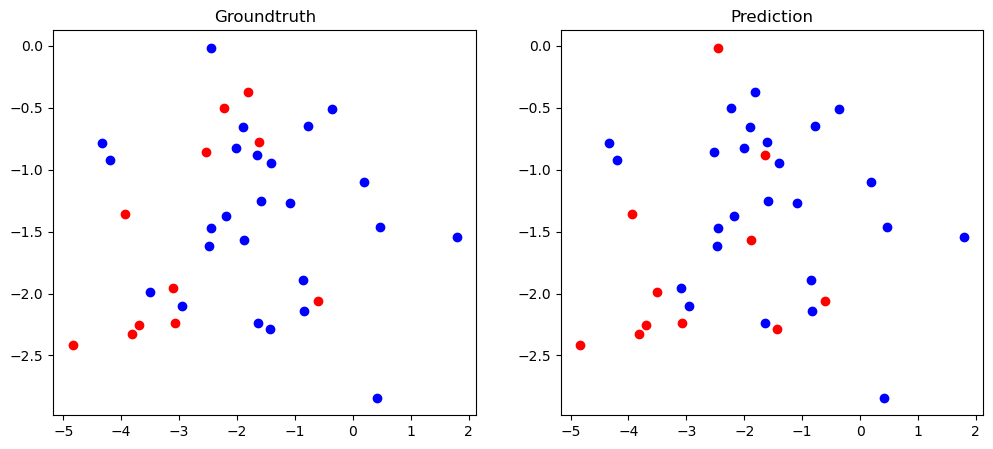

In [63]:
params = {
    "n_estimators": [50, 100, 200],           # Nombre d'arbres
    "max_depth": [3, 5, 7],                  # Profondeur maximale des arbres
    "learning_rate": [0.01, 0.1, 0.2],       # Taux d'apprentissage
    "subsample": [0.6, 0.8, 1.0],            # Sous-échantillonnage des données
    "colsample_bytree": [0.6, 0.8, 1.0],     # Sous-échantillonnage des colonnes
    "gamma": [0, 0.1, 0.5, 1]                   # Pénalisation pour éviter les sur-ajustements
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
scoring = 'f1'

grid_search, df_pred = tune_parameters(xgb, params, scoring)


## Error estimation

With our best model, we perform again cross-validation on $(X,y)$ data to estimate its errors with the four metrics.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb


# XGBoost best model
model = xgb.XGBClassifier(colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6)

# Metrics manual computing
def compute_metrics(y_true, y_pred):
    # Init for counters TP, TN, FP, FN
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Metric computing
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

# Cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True)

# Initialize results stacking
accuracies, precisions, recalls, f1_scores = [], [], [], []

for train_idx, test_idx in kf.split(X, y):
    # Train test split
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred)
    
    # Stack results
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Mean and std for metrics
results = {
    "Accuracy": (np.mean(accuracies), np.std(accuracies)),
    "Precision": (np.mean(precisions), np.std(precisions)),
    "Recall": (np.mean(recalls), np.std(recalls)),
    "F1-Score": (np.mean(f1_scores), np.std(f1_scores)),
}

# Afficher les résultats
for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Accuracy: Mean = 0.6900, Std = 0.0490
Precision: Mean = 0.5400, Std = 0.0666
Recall: Mean = 0.4905, Std = 0.0923
F1-Score: Mean = 0.5088, Std = 0.0600


## Save predictions

Finally, let's save our predictions.

In [ ]:
# np.savetxt('data/y_val.txt', df_pred['pred'].values)